In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# Data columns
##고객 특성
* customerID
* gender : 성별
* SeniorCitizen : 시니어인지(1, 0)
*  Partner : 파트너 유무(Yes, No)
*   Dependents : 부양가족 유무(Yes, No)
*   tenure : 이용 개월수
## 서비스
*   PhoneService : 음성전화(Yes, No)
*   MultipleLines : 다중회선(Yes, No, No phone service)
*   InternetService : 인터넷(DSL-디지털가입자회선, Fiber optic-광통신, No)
*   OnlineSecurity : 보안프로그램(Yes, No, No internet service)
*   OnlineBackup : 백업프로그램(Yes, No, No internet service)
*   DeviceProtection : 장치보호(Yes, No, No internet service)
*   TechSupport : 기술도움(Yes, No, No internet service)
*   StreamingTV : TV 스트리밍(Yes, No, No internet service)
*   StreamingMovies : 영화 스트리밍(Yes, No, No internet service)
## 요금 납부
*  Contract : 계약 기간(월, 1년, 2년)
*   PaperlessBilling : 온라인청구서(Yes, No)
*   PaymentMethod : 납부 방법(Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
*   MonthlyCharges : 월 납부금액
*   TotalCharges : 총 납부금액
## 이탈자
* Churn(Yes, No)







In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.describe().round(2)

,SeniorCitizen,tenure,MonthlyCharges
count,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76
std,0.37,24.56,30.09
min,0.00,0.00,18.25
25%,0.00,9.00,35.50
50%,0.00,29.00,70.35
75%,0.00,55.00,89.85
max,1.00,72.00,118.75


In [ ]:
df.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges의 데이터 형식이 문자열이고 Null값이 없다고 나오지만 요약정보로 확인하니 결측치 11개 있다.

In [ ]:
df.loc[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


tenure(이용 개월수)가 0이라서 아직 TotalCharges가 없는 것으로 예측

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
# TotalCharges 결측치 제거
df = df.dropna(subset=['TotalCharges'])

In [ ]:
# 'customerID'와 'gender' 열 제거
# df = df.drop(['customerID', 'gender'], axis=1)

In [7]:
# SeniorCitizen 문자형 타입 변경
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})

In [8]:
# StreamingService 생성 (StreamingTV + StreamingMovies)
df['StreamingService'] = df.apply(lambda row: 'Yes'
                                  if row['StreamingTV'] == 'Yes' or row['StreamingMovies'] == 'Yes'
                                  else 'No', axis=1)
df = pd.concat([df.iloc[:, :11], df.pop('StreamingService'), df.iloc[:, 11:]], axis=1)

SeniorCitizen 값을 Yes, No로 변환하였다.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  StreamingService  7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [ ]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [ ]:
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,No


데이터 탐색 및 분석

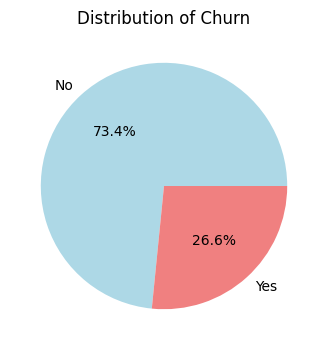

In [ ]:
# 이탈자와 비이탈자 비율을 파이 그래프로 나타내기
gender_counts = df['Churn'].value_counts()

plt.figure(figsize=(4,4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Distribution of Churn')
plt.show()

고객에 따른 이탈자 특성

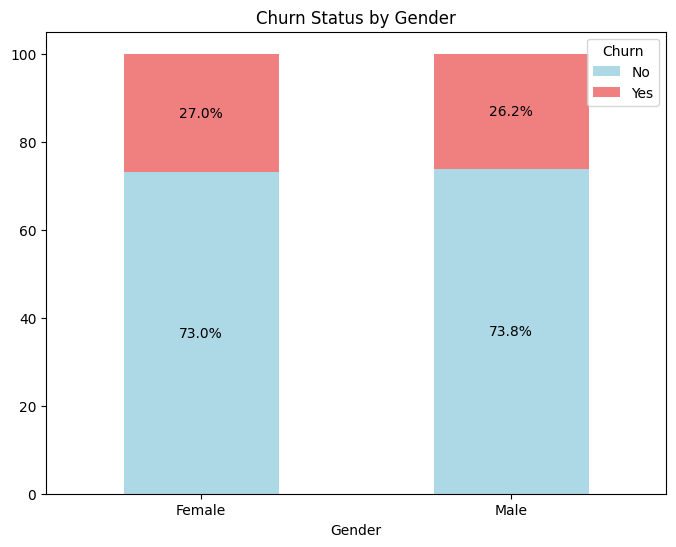

In [10]:
# 'Male'과 'Female'에 따른 이탈자와 비이탈자의 수 구하기
gender_churn_counts = df.groupby(['gender', 'Churn']).size().unstack()

# 각 성별에 대한 이탈자와 비이탈자의 백분율 계산
gender_churn_percentages = gender_churn_counts.div(gender_churn_counts.sum(axis=1), axis=0) * 100

# 막대 그래프로 시각화
ax = gender_churn_percentages.plot(kind='bar', stacked=True, color=['lightblue','lightcoral'], figsize=(8, 6))
plt.title('Churn Status by Gender')
plt.xlabel('Gender')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation='horizontal')

# 백분율 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

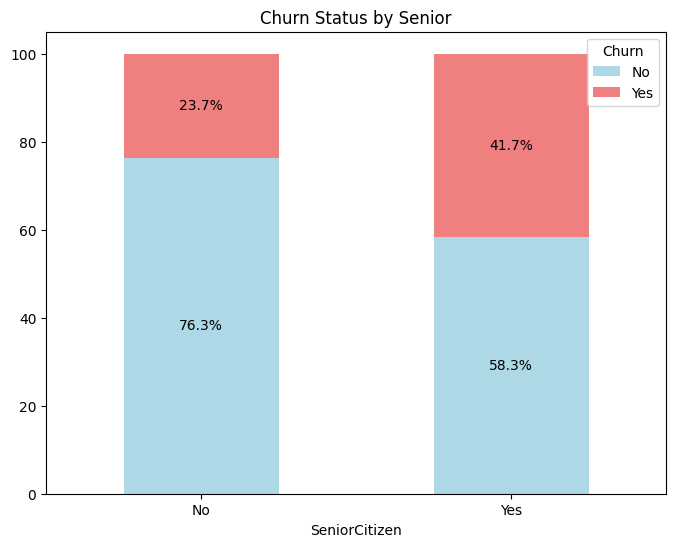

In [ ]:
# SeniorCitizen에 따른 이탈자와 비이탈자의 수 구하기
senior_churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# 나이에 대한 이탈자와 비이탈자의 백분율 계산
senior_churn_percentages = senior_churn_counts.div(senior_churn_counts.sum(axis=1), axis=0) * 100

# 막대 그래프로 시각화
ax = senior_churn_percentages.plot(kind='bar', stacked=True, color=['lightblue','lightcoral'], figsize=(8, 6))
plt.title('Churn Status by Senior')
plt.xlabel('SeniorCitizen')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation='horizontal')

# 백분율 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

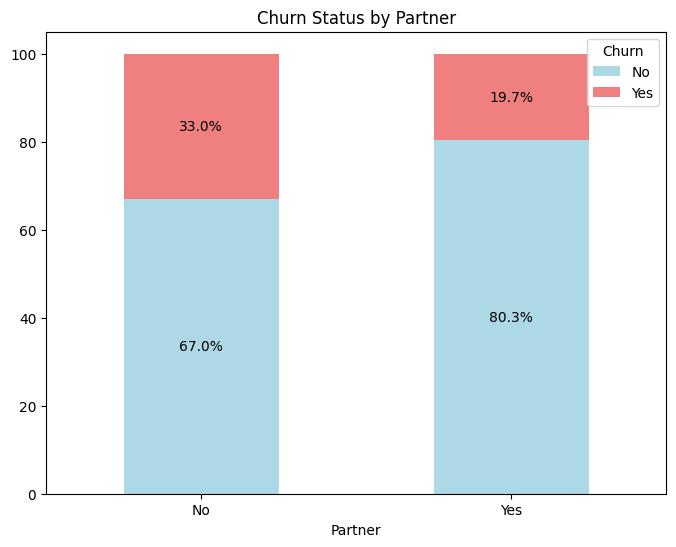

In [ ]:
# Partner에 따른 이탈자와 비이탈자의 수 구하기
Partner_churn_counts = df.groupby(['Partner', 'Churn']).size().unstack()

# 배우자 유무에 대한 이탈자와 비이탈자의 백분율 계산
Partner_churn_percentages = Partner_churn_counts.div(Partner_churn_counts.sum(axis=1), axis=0) * 100

# 막대 그래프로 시각화
ax = Partner_churn_percentages.plot(kind='bar', stacked=True, color=['lightblue','lightcoral'], figsize=(8, 6))
plt.title('Churn Status by Partner')
plt.xlabel('Partner')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation='horizontal')

# 백분율 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

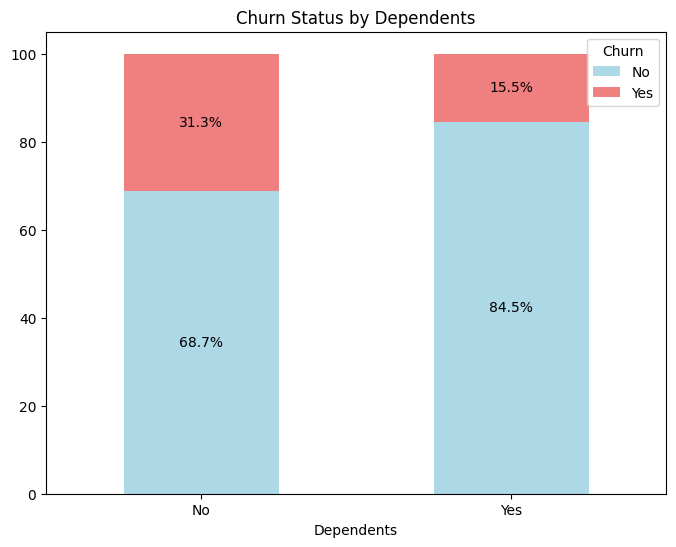

In [ ]:
# Dependents에 따른 이탈자와 비이탈자의 수 구하기
Dependents_churn_counts = df.groupby(['Dependents', 'Churn']).size().unstack()

# 배우자 유무에 대한 이탈자와 비이탈자의 백분율 계산
Dependents_churn_percentages = Dependents_churn_counts.div(Dependents_churn_counts.sum(axis=1), axis=0) * 100

# 막대 그래프로 시각화
ax = Dependents_churn_percentages.plot(kind='bar', stacked=True, color=['lightblue','lightcoral'], figsize=(8, 6))
plt.title('Churn Status by Dependents')
plt.xlabel('Dependents')
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])
plt.xticks(rotation='horizontal')

# 백분율 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

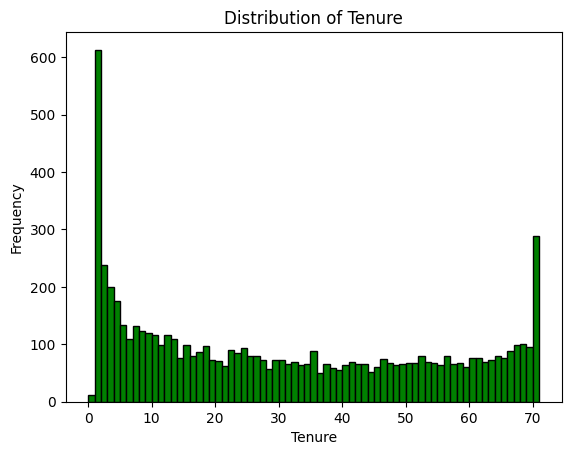

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['tenure'],bins=range(0, max(df['tenure']), 1), color='green', edgecolor='black')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

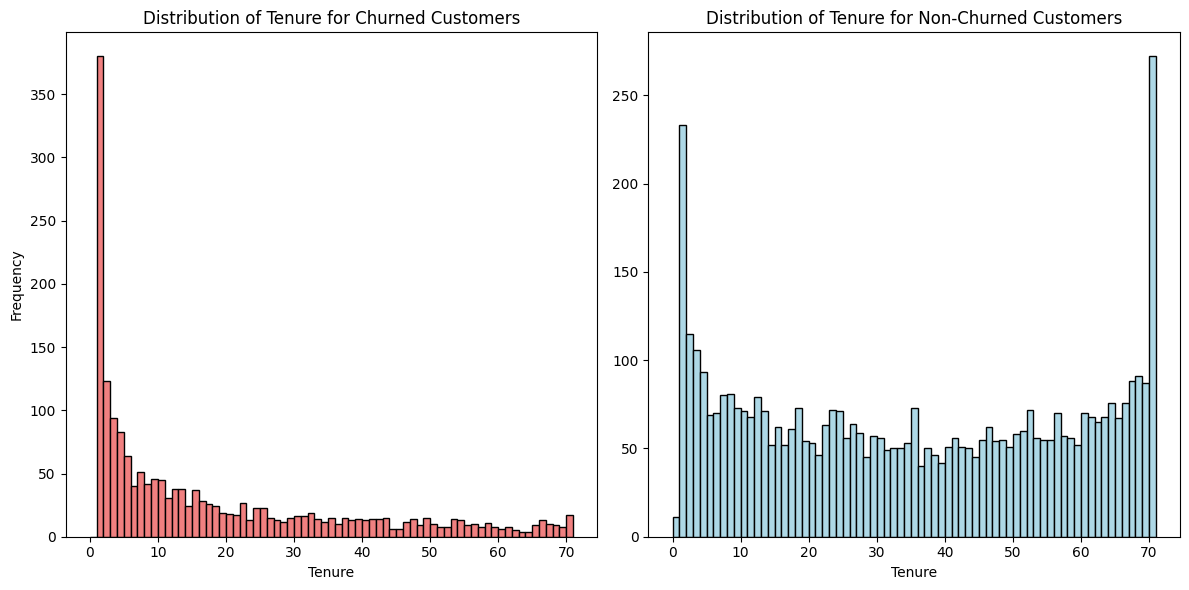

In [ ]:
# 이탈자(Churn: yes)와 비이탈자(Churn: no)의 tenure 분포 시각화
churn_data = df[df['Churn'] == 'Yes']
no_churn_data = df[df['Churn'] == 'No']

plt.figure(figsize=(12, 6))

# 이탈자의 tenure 분포
plt.subplot(1, 2, 1)
plt.hist(churn_data['tenure'], bins=range(0, max(churn_data['tenure']), 1), color='lightcoral', edgecolor='black')
plt.title('Distribution of Tenure for Churned Customers')
plt.xlabel('Tenure')
plt.ylabel('Frequency')

# 비이탈자의 tenure 분포
plt.subplot(1, 2, 2)
plt.hist(no_churn_data['tenure'], bins=range(0, max(no_churn_data['tenure']), 1), color='lightblue', edgecolor='black')
plt.title('Distribution of Tenure for Non-Churned Customers')
plt.xlabel('Tenure')

plt.tight_layout()
plt.show()

이용개월수가 1개월만 지나면 급격히 이탈자가 줄어든다. 초반 이용자를 묶어놓는게 중요하다.

서비스에 대한 이탈자 특성

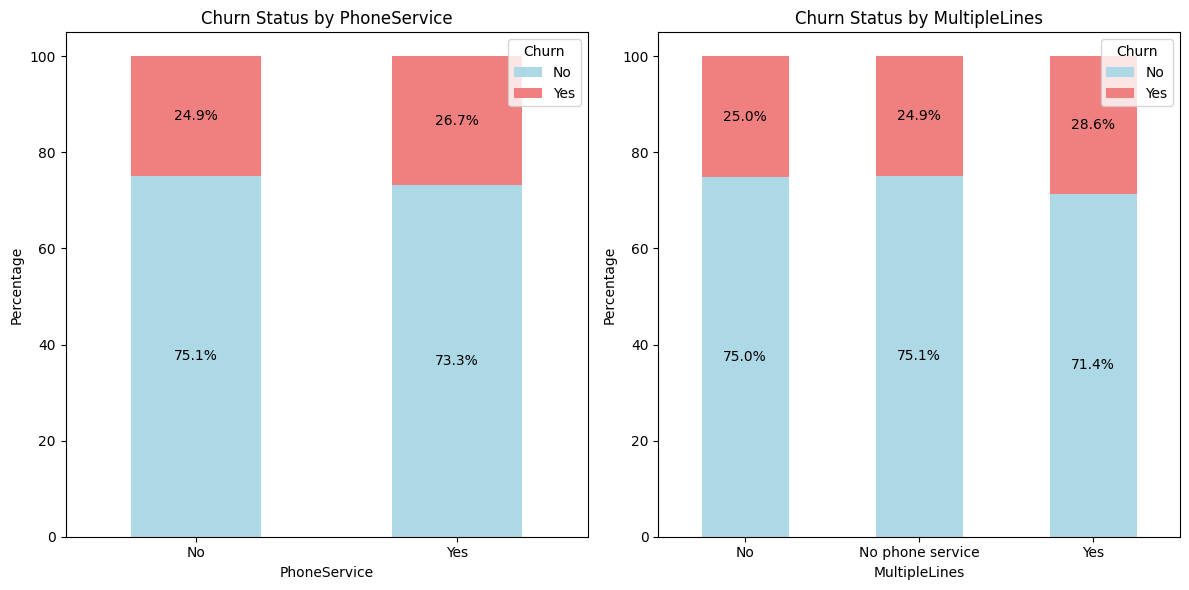

In [ ]:
# PhoneService에 따른 이탈자 비율 계산
phone_churn_percentages = df.groupby(['PhoneService', 'Churn']).size().unstack().div(df['PhoneService'].value_counts(), axis=0) * 100

# MultipleLines에 따른 이탈자 비율 계산
lines_churn_percentages = df.groupby(['MultipleLines', 'Churn']).size().unstack().div(df['MultipleLines'].value_counts(), axis=0) * 100

# subplot으로 표현
plt.figure(figsize=(12, 6))

# PhoneService에 따른 이탈자 비율 subplot
plt.subplot(1, 2, 1)
ax1 = phone_churn_percentages.plot(kind='bar', stacked=True, color=['lightblue','lightcoral'], ax=plt.gca())
plt.title('Churn Status by PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right', labels=['No','Yes'])
plt.xticks(rotation='horizontal')

# 퍼센트 값 표시
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax1.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')


# MultipleLines에 따른 이탈자 비율 subplot
plt.subplot(1, 2, 2)
ax2 = lines_churn_percentages.plot(kind='bar', stacked=True, color=['lightblue','lightcoral'], ax=plt.gca())
plt.title('Churn Status by MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right', labels=['No','Yes'])
plt.xticks(rotation='horizontal')

# 퍼센트 값 표시
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax2.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')


plt.tight_layout()
plt.show()

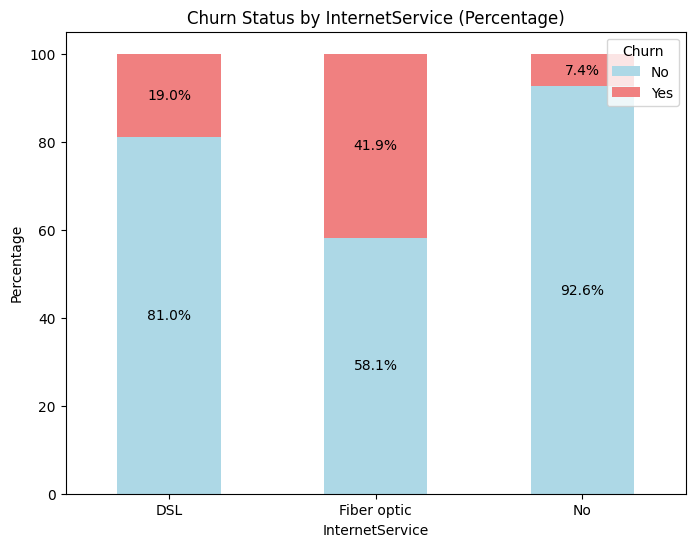

In [ ]:
InternetService_churn_counts = df.groupby(['InternetService', 'Churn']).size().unstack()

# 각 성별에 대한 이탈자와 비이탈자의 백분율 계산
InternetService_churn_percentages = InternetService_churn_counts.div(InternetService_churn_counts.sum(axis=1), axis=0) * 100

# 막대 그래프로 시각화
ax = InternetService_churn_percentages.plot(kind='bar', stacked=True, color=['lightblue','lightcoral'], figsize=(8, 6))
plt.title('Churn Status by InternetService (Percentage)')
plt.xlabel('InternetService')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right', labels=['No','Yes'])
plt.xticks(rotation='horizontal')

# 백분율 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

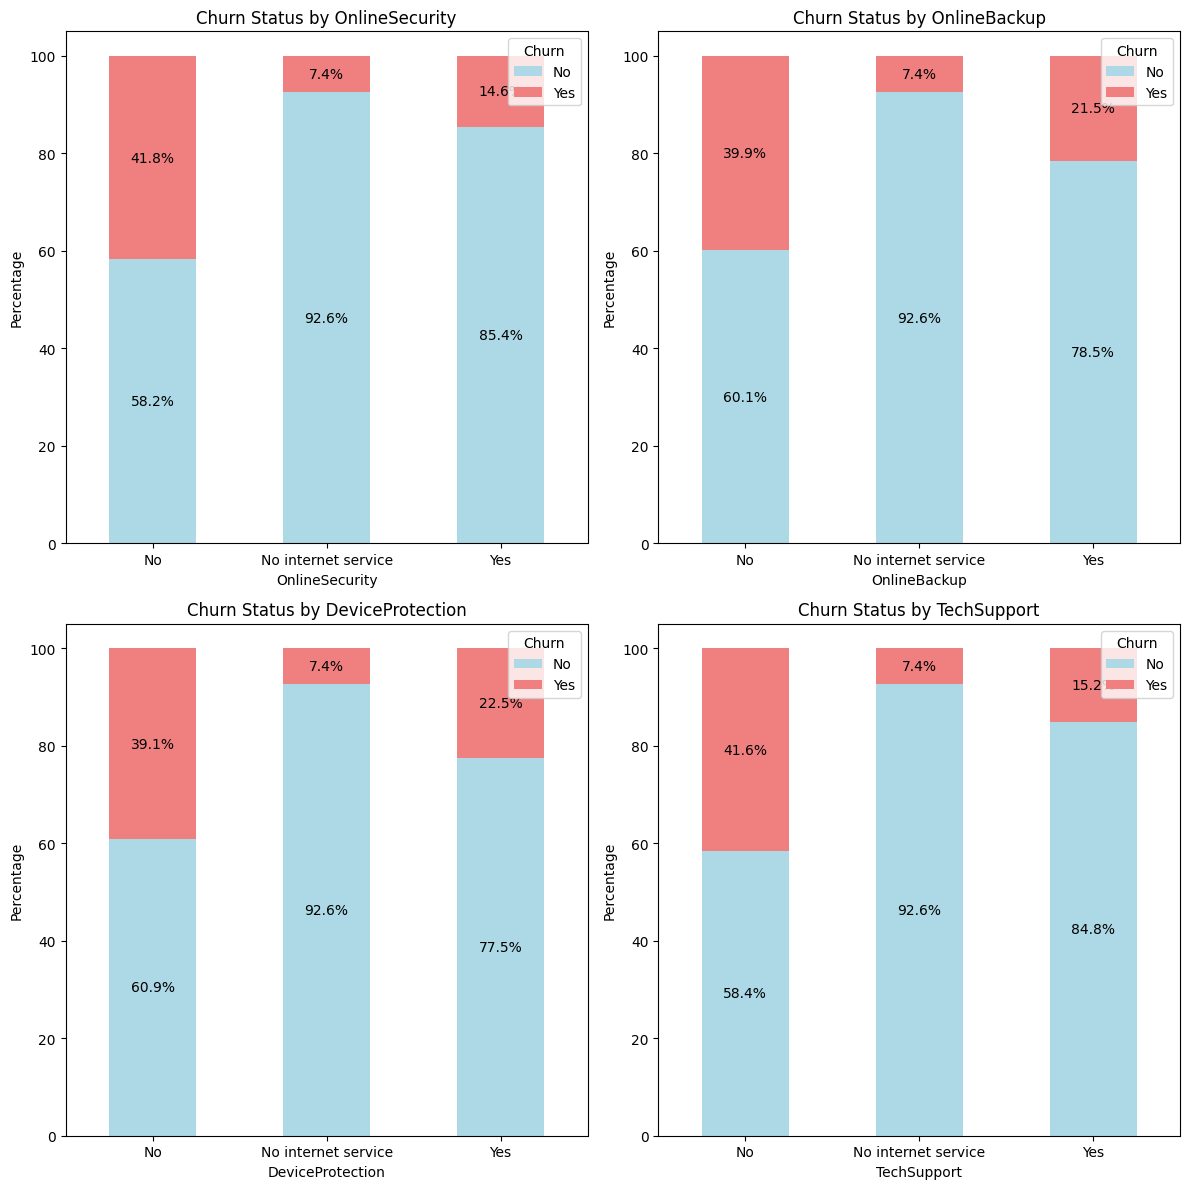

In [ ]:
columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
churn_percentages = {}

for col in columns:
    churn_percentages[col] = df.groupby([col, 'Churn']).size().unstack().div(df[col].value_counts(), axis=0) * 100

# subplot으로 표현
plt.figure(figsize=(12, 12))

for i, col in enumerate(columns, start=1):
    plt.subplot(2, 2, i)
    ax = churn_percentages[col].plot(kind='bar', stacked=True, color=['lightblue','lightcoral'], ax=plt.gca())
    plt.title(f'Churn Status by {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.legend(title='Churn', loc='upper right', labels=['No','Yes'])
    plt.xticks(rotation='horizontal')

    # 퍼센트 값 표시
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()

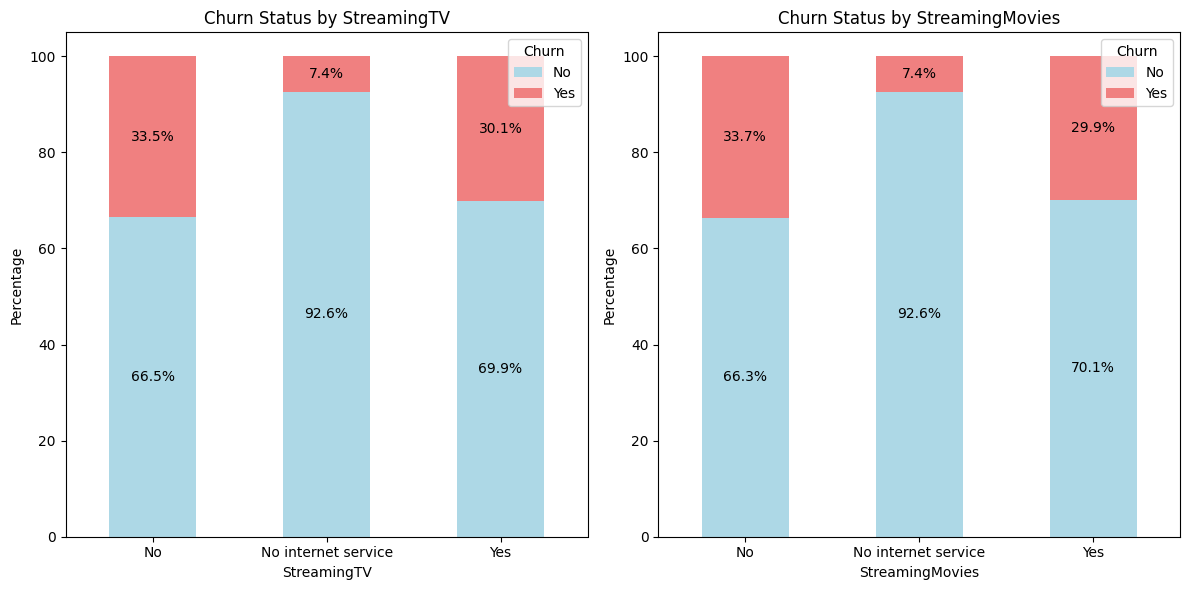

In [ ]:
# StreamingTV에 따른 이탈자 비율 계산
StreamingTV_churn_percentages = df.groupby(['StreamingTV', 'Churn']).size().unstack().div(df['StreamingTV'].value_counts(), axis=0) * 100

# StreamingMovies에 따른 이탈자 비율 계산
StreamingMovies_churn_percentages = df.groupby(['StreamingMovies', 'Churn']).size().unstack().div(df['StreamingMovies'].value_counts(), axis=0) * 100

# subplot으로 표현
plt.figure(figsize=(12, 6))

# StreamingTV에 따른 이탈자 비율 subplot
plt.subplot(1, 2, 1)
ax1 = StreamingTV_churn_percentages.plot(kind='bar', stacked=True, color=['lightblue','lightcoral'], ax=plt.gca())
plt.title('Churn Status by StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right', labels=['No','Yes'])
plt.xticks(rotation='horizontal')

# 퍼센트 값 표시
for p in ax1.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax1.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')


# StreamingMovies에 따른 이탈자 비율 subplot
plt.subplot(1, 2, 2)
ax2 = StreamingMovies_churn_percentages.plot(kind='bar', stacked=True, color=['lightblue','lightcoral'], ax=plt.gca())
plt.title('Churn Status by StreamingMovies')
plt.xlabel('StreamingMovies')
plt.ylabel('Percentage')
plt.legend(title='Churn', loc='upper right', labels=['No','Yes'])
plt.xticks(rotation='horizontal')

# 퍼센트 값 표시
for p in ax2.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax2.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')


plt.tight_layout()
plt.show()

요금 납무에 대한 이탈자 특성

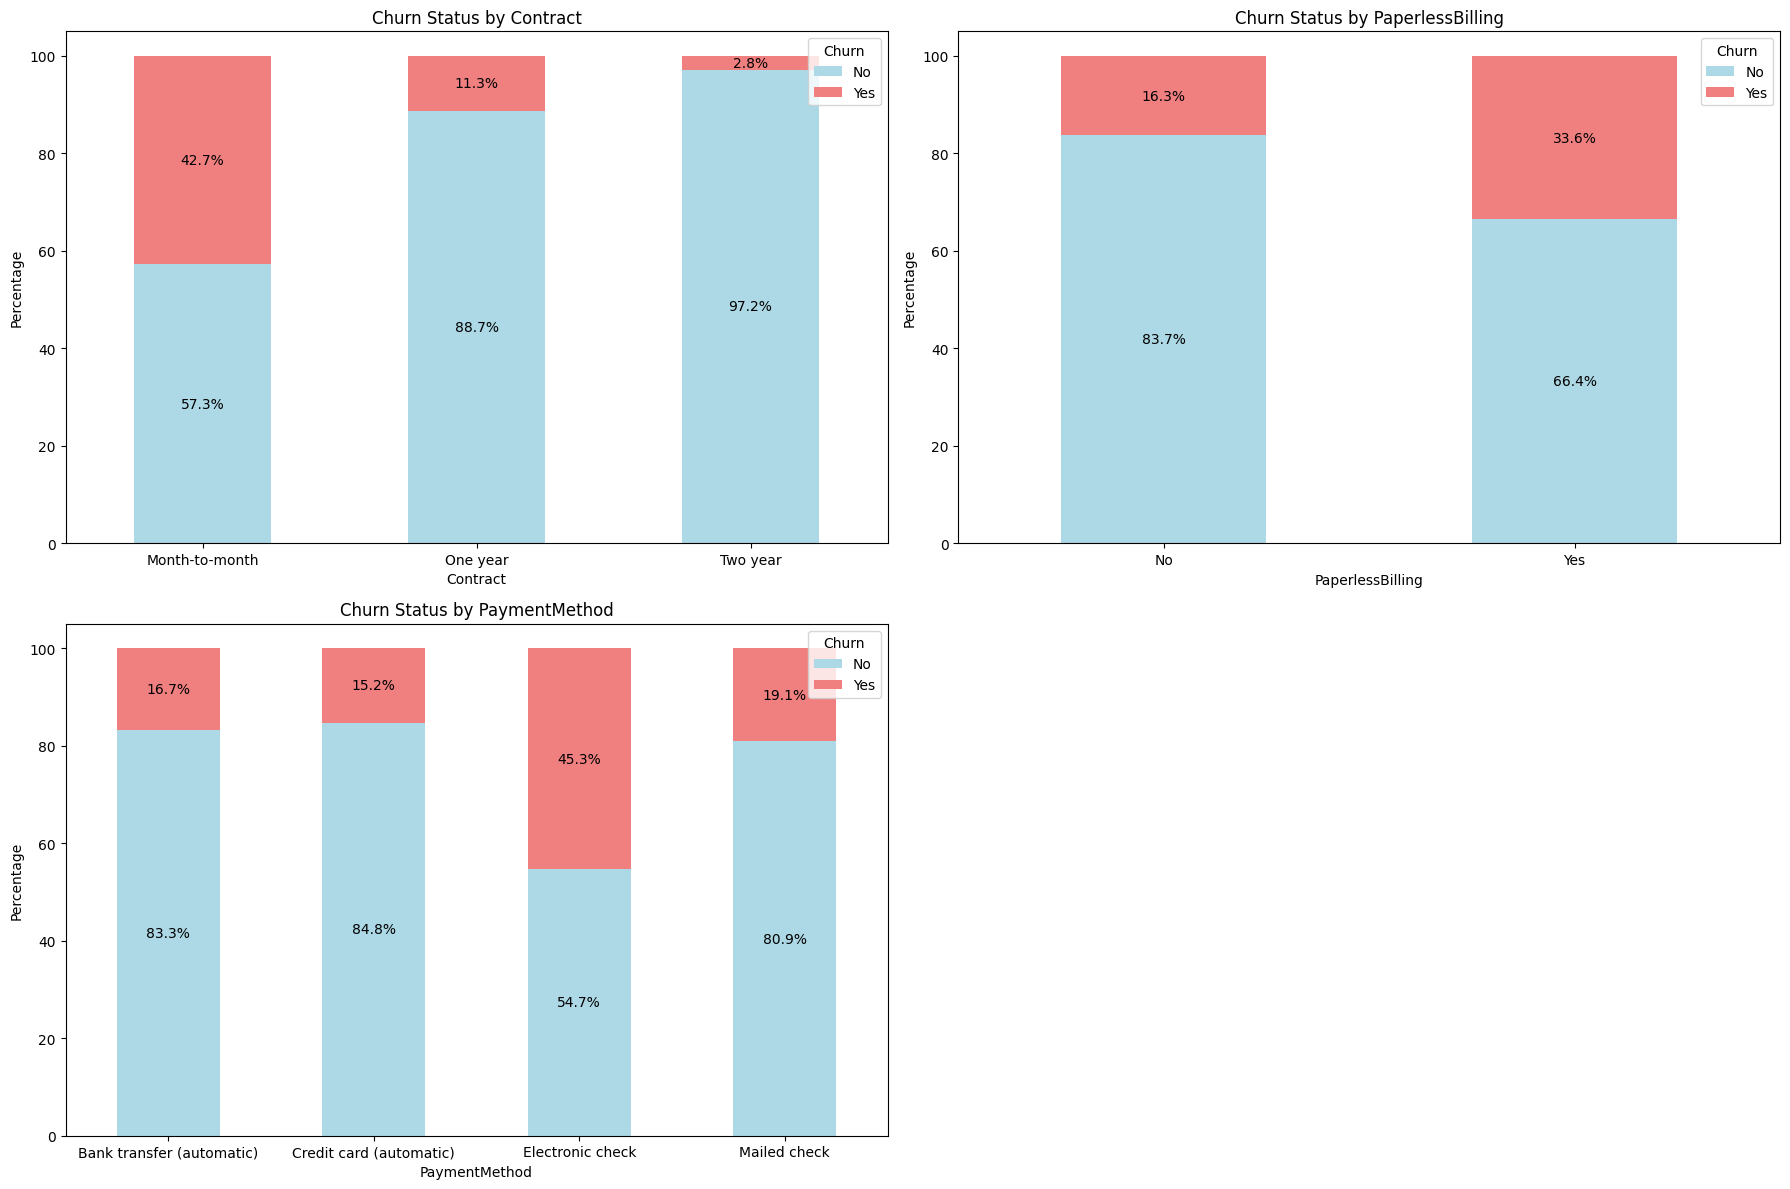

In [ ]:
columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']
churn_percentages = {}

for col in columns:
    churn_percentages[col] = df.groupby([col, 'Churn']).size().unstack().div(df[col].value_counts(), axis=0) * 100

# subplot으로 표현
plt.figure(figsize=(18, 12))

for i, col in enumerate(columns, start=1):
    plt.subplot(2, 2, i)
    ax = churn_percentages[col].plot(kind='bar', stacked=True, color=['lightblue','lightcoral'], ax=plt.gca())
    plt.title(f'Churn Status by {col}')
    plt.xlabel(col)
    plt.ylabel('Percentage')
    plt.legend(title='Churn', loc='upper right', labels=['No','Yes'])
    plt.xticks(rotation='horizontal')

    # 퍼센트 값 표시
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.tight_layout()
plt.show()

In [ ]:
df.describe().round(2)

,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00
mean,32.37,64.76,2279.73
std,24.56,30.09,2266.79
min,0.00,18.25,0.00
25%,9.00,35.50,398.55
50%,29.00,70.35,1394.55
75%,55.00,89.85,3786.60
max,72.00,118.75,8684.80


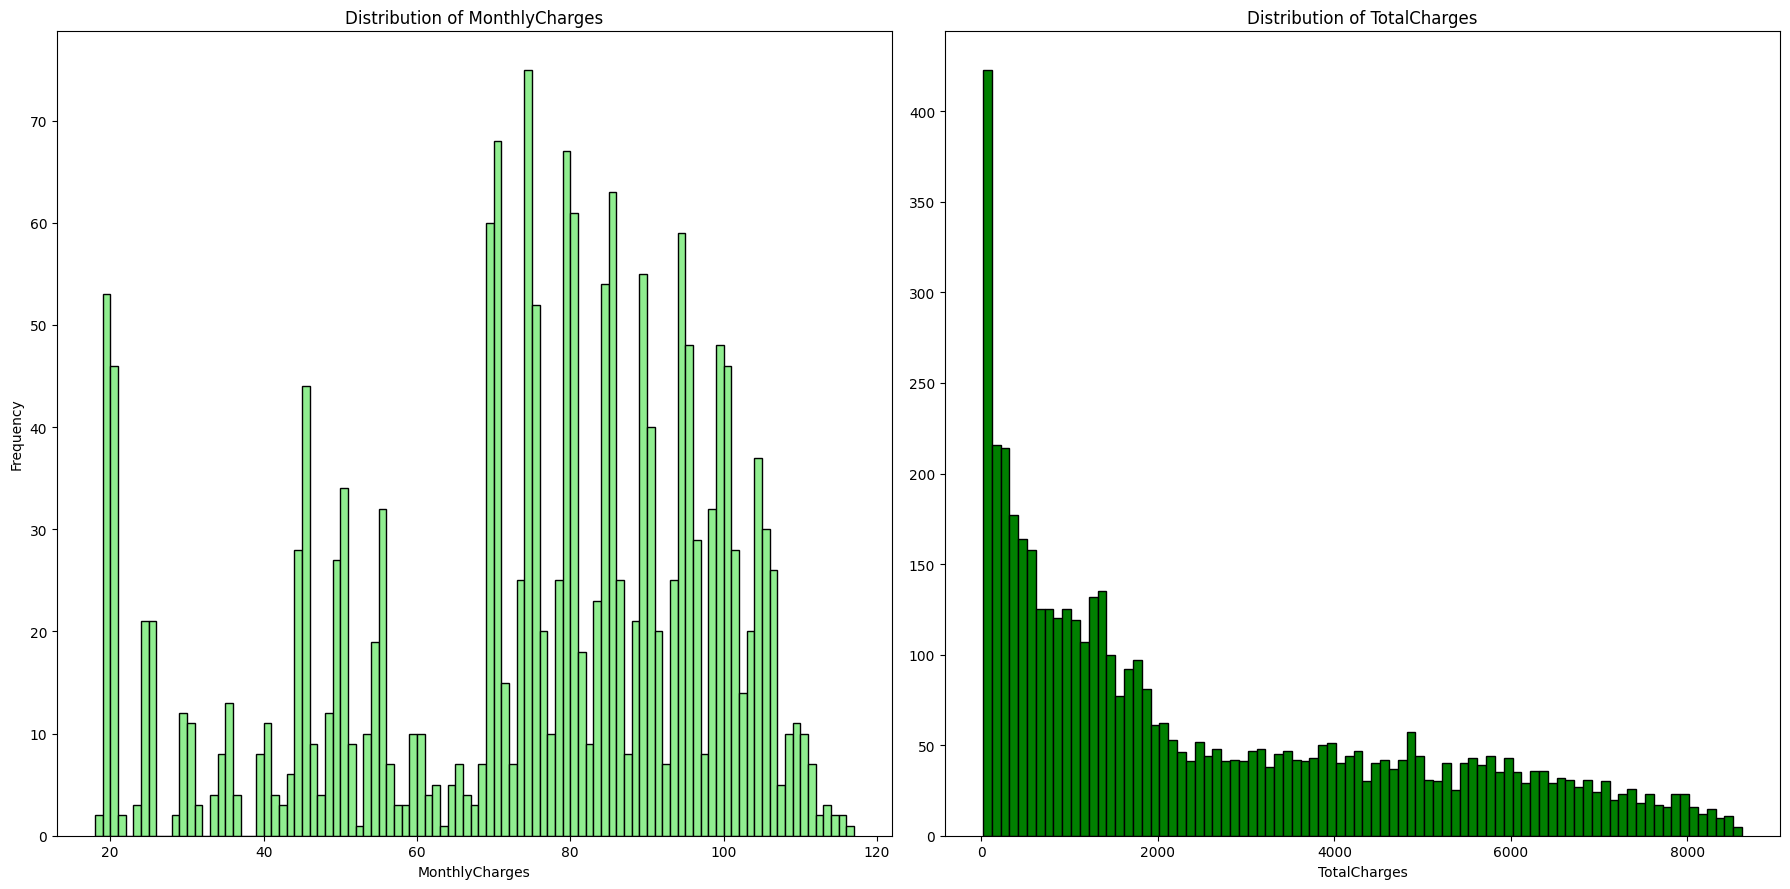

In [ ]:
plt.figure(figsize=(18, 9))
# MonthlyCharges 분포
plt.subplot(1, 2, 1)
plt.hist(churn_data['MonthlyCharges'], bins=range(int(min(churn_data['MonthlyCharges'])), int(max(churn_data['MonthlyCharges'])), 1), color='lightgreen', edgecolor='black')
plt.title('Distribution of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')

# TotalCharges 분포
plt.subplot(1, 2, 2)
plt.hist(no_churn_data['TotalCharges'], bins=range(int(min(churn_data['TotalCharges'])), int(max(no_churn_data['TotalCharges'])), 100), color='green', edgecolor='black')
plt.title('Distribution of TotalCharges')
plt.xlabel('TotalCharges')

plt.tight_layout()
plt.show()

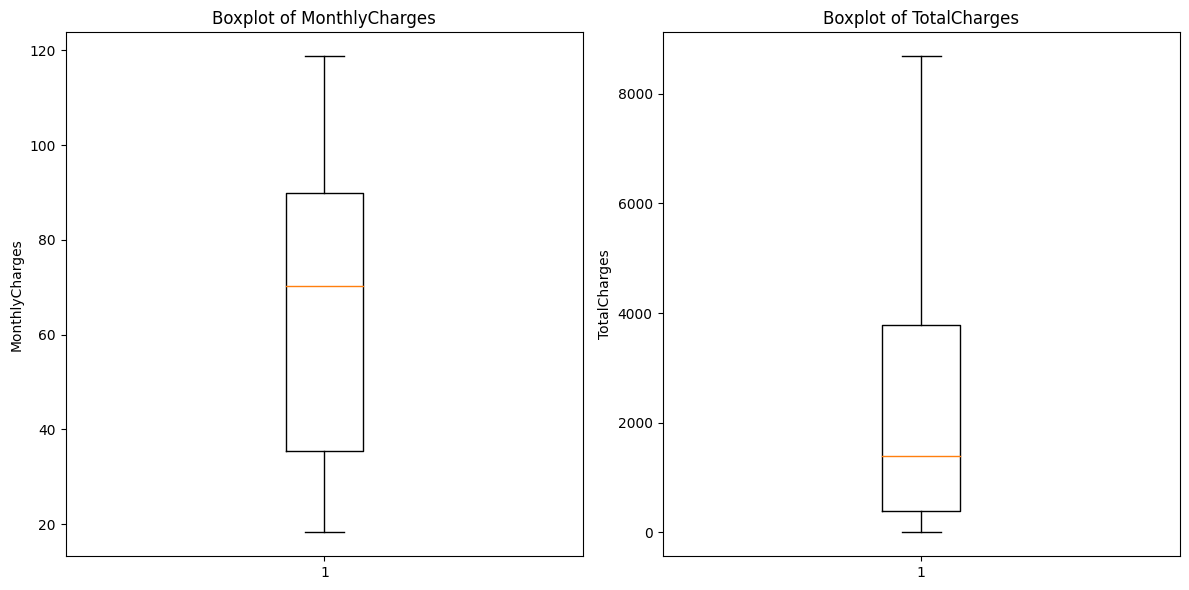

In [ ]:
# 서브플롯으로 TotalCharges와 MonthlyCharges 열의 박스플롯 그리기
plt.figure(figsize=(12, 6))

# 첫 번째 서브플롯
plt.subplot(1, 2, 1)
plt.boxplot(df['MonthlyCharges'])
plt.title('Boxplot of MonthlyCharges')
plt.ylabel('MonthlyCharges')

# 두 번째 서브플롯
plt.subplot(1, 2, 2)
plt.boxplot(df['TotalCharges'])
plt.title('Boxplot of TotalCharges')
plt.ylabel('TotalCharges')

plt.tight_layout()
plt.show()

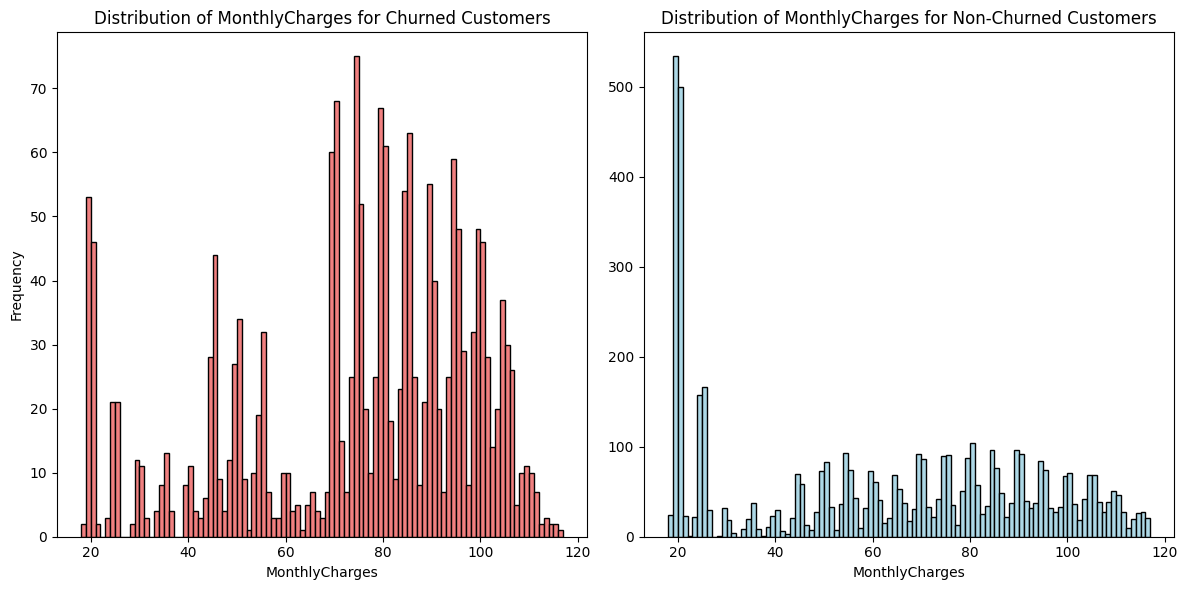

In [ ]:
# 이탈자(Churn: yes)와 비이탈자(Churn: no)의 MonthlyCharges 분포 시각화
churn_data = df[df['Churn'] == 'Yes']
no_churn_data = df[df['Churn'] == 'No']

plt.figure(figsize=(12, 6))

# 이탈자의 MonthlyCharges  분포
plt.subplot(1, 2, 1)
plt.hist(churn_data['MonthlyCharges'], bins=range(int(min(churn_data['MonthlyCharges'])), int(max(churn_data['MonthlyCharges'])), 1), color='lightcoral', edgecolor='black')
plt.title('Distribution of MonthlyCharges for Churned Customers')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')

# 비이탈자의 MonthlyCharges  분포
plt.subplot(1, 2, 2)
plt.hist(no_churn_data['MonthlyCharges'], bins=range(int(min(churn_data['MonthlyCharges'])), int(max(no_churn_data['MonthlyCharges'])), 1), color='lightblue', edgecolor='black')
plt.title('Distribution of MonthlyCharges for Non-Churned Customers')
plt.xlabel('MonthlyCharges')

plt.tight_layout()
plt.show()

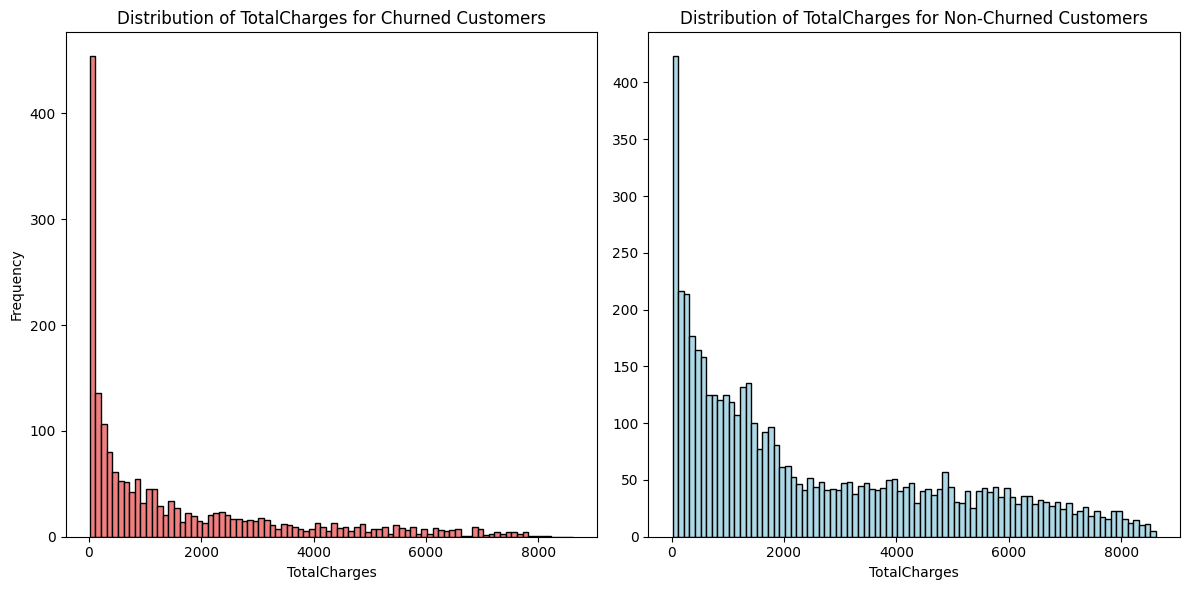

In [ ]:
# 이탈자(Churn: yes)와 비이탈자(Churn: no)의 TotalCharges 분포 시각화
churn_data = df[df['Churn'] == 'Yes']
no_churn_data = df[df['Churn'] == 'No']

plt.figure(figsize=(12, 6))

# 이탈자의 TotalCharges  분포
plt.subplot(1, 2, 1)
plt.hist(churn_data['TotalCharges'], bins=range(int(min(churn_data['TotalCharges'])), int(max(churn_data['TotalCharges'])), 100), color='lightcoral', edgecolor='black')
plt.title('Distribution of TotalCharges for Churned Customers')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')

# 비이탈자의 TotalCharges  분포
plt.subplot(1, 2, 2)
plt.hist(no_churn_data['TotalCharges'], bins=range(int(min(churn_data['TotalCharges'])), int(max(no_churn_data['TotalCharges'])), 100), color='lightblue', edgecolor='black')
plt.title('Distribution of TotalCharges for Non-Churned Customers')
plt.xlabel('TotalCharges')

plt.tight_layout()
plt.show()

상관분석

In [ ]:
binary_columns = ['Churn','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']

for col in binary_columns:
    df[col+'_Binary'] = df[col].apply(lambda x: 0 if 'no' in x.lower() else 1)


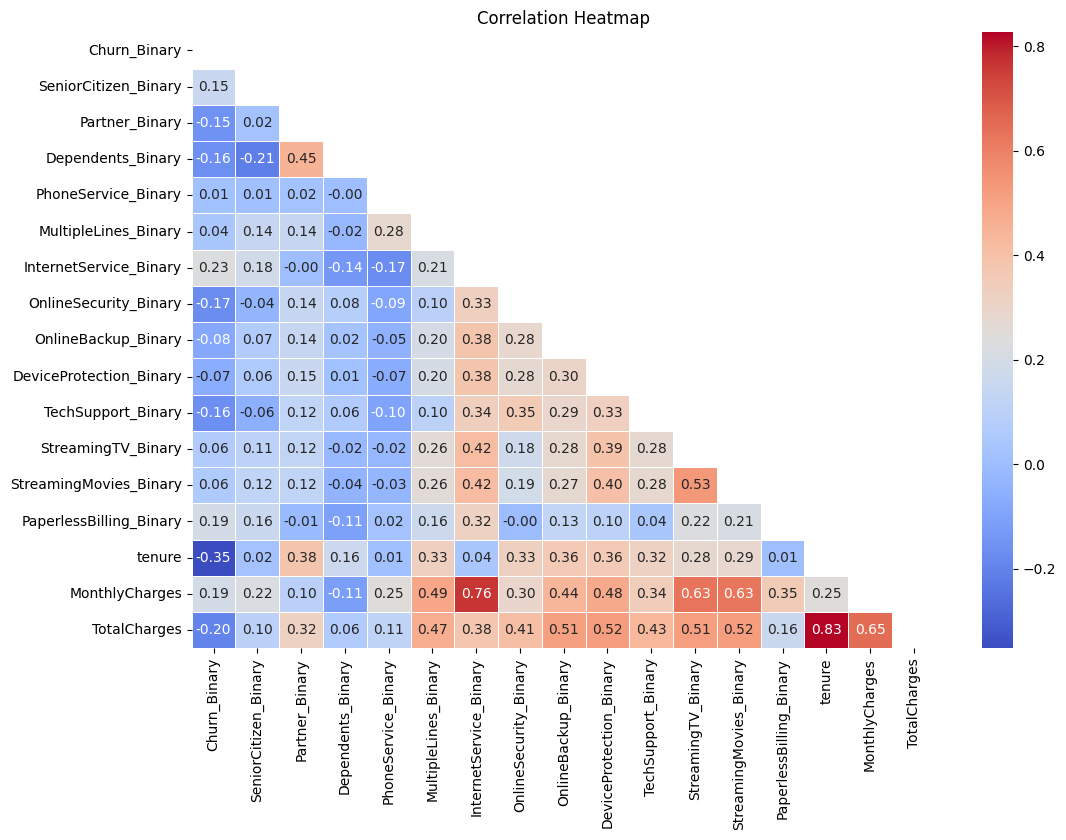

In [ ]:
# 히트맵을 그리기 위해 필요한 열 선택
selected_columns = [col+'_Binary' for col in binary_columns]+['tenure', 'MonthlyCharges', 'TotalCharges']

# 상관 행렬 계산
correlation_matrix = df[selected_columns].corr()

# 절반만 보여주기 위한 마스크 생성
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, mask=mask)
plt.title('Correlation Heatmap')
plt.show()